In [2]:
import pandas as pd
import numpy as np
from datetime import timedelta
import re

In [2]:
# DATA QUALITY ANALYSIS WITH TWO TYPES OF ERRORS: NA AND ERROR

# Detailed passport (fields not required for KBM) and driving license data quality analysis
df = pd.read_csv('C:/Users/sgulbin/Work/Data/KBM_data/for_Alfa_100K.csv', low_memory = False)
print(len(df.index))

# Format datetime data
df['birthday'] = pd.to_datetime(df['birthday'], errors = 'coerce')

# Marking null values
df = df.loc[(df.License != np.nan)&\
            (df.birthday != np.nan)&\
            (df.first_name != np.nan)&\
            (df.patronymic_name != np.nan)&\
            (df.last_name != np.nan)&\
            (df.patronymic_name != 'Отчества')&
            (df.patronymic_name != 'Отчество')&
            (df.patronymic_name != 'Нет')&
            (df.patronymic_name != 'Отсутствует')&
            (df.patronymic_name != 'Нет Данных')&
            (df.patronymic_name != 'В')&
            (df.patronymic_name != 'Процессе')&
            (df.first_name != 'Нет')&
            (df.first_name != 'Отсутствует')&
            (df.first_name != 'Нет Данных')&
            (df.first_name != 'В')&
            (df.first_name != 'Процессе')&
            (df.last_name != 'Нет')&
            (df.last_name != 'Отсутствует')&
            (df.last_name != 'Нет Данных')&
            (df.last_name != 'В')&
            (df.last_name != 'Процессе')]

# Marking incorrect datetime data
df = df.loc[((pd.to_datetime('today')-df['birthday']).astype('timedelta64[Y]') > 19.0)&\
                        ((pd.to_datetime('today')-df['birthday']).astype('timedelta64[Y]') < 80.0)]

# Marking incorrect pattern/length
df = df.loc[((df.License.str.replace(' ','')).str.len()==10.0)]
df = df.loc[(df.License.str.replace(' ','').str.match(pat = r'(\d)\1{9,}') == False)&\
            (df.License.str.replace(' ','').str.match(pat = r'^[0-9а-яА-Яa-zA-Z ]+$') == True)]

# Marking errors with name
for name in ['first_name', 'last_name','patronymic_name']:
    for i in [' Мойка',' Каршайн', ' Карсервис', ' Омывайка', ' Нафта', ' Пройл', ' Пролив', ' Механик', ' Спб','Перегонщик',\
             'Пмеханик','Прайм','Сб', 'Телематик','Телематика','Установщик', 'Шмеханик']:
        df[name] = df[name].str.replace(i,'')
df = df.replace(to_replace = '\s\(.+\)',value = '',regex = True)
df = df.loc[df['first_name'].str.match(pat = \
                    '(^[а-яА-Я]+$)|(^[а-яА-Я]+\-[а-яА-Я]+$)|(^[а-яА-Я]+\s\-\s[а-яА-Я]+$)|(^[а-яА-Я]+\s[а-яА-Я]+$)') == True]
df = df.loc[df['patronymic_name'].str.match(pat = \
                    '(^[а-яА-Я]+$)|(^[а-яА-Я]+\-[а-яА-Я]+$)|(^[а-яА-Я]+\s\-\s[а-яА-Я]+$)|(^[а-яА-Я]+\s[а-яА-Я]+$)') == True]
df = df.loc[df['last_name'].str.match(pat = \
                    '(^[а-яА-Я]+$)|(^[а-яА-Я]+\-[а-яА-Я]+$)|(^[а-яА-Я]+\s\-\s[а-яА-Я]+$)|(^[а-яА-Я]+\s[а-яА-Я]+$)') == True]

# Leaving only users that are Russian citizens
# df_rus = df.loc[df.rus_ctzn == 1.0]
# df.to_csv('C:/Users/sgulbin/Work/Data/KBM_data/for_Alfa_100K_cleaned.csv')
df

858132


,user_id,user_ext,NameRu,activation_dtime,License,first_name,patronymic_name,last_name,birthday,number_of_rents_2020,rus_ctzn
1,19622861,380692,Активирован,1/9/2018 16:25,7736570809,Павел,Александрович,Сырманов,1989-10-20,1809.0,1.0
4,101750691,23126235,Активирован,9/23/2019 18:12,9902 226822,Маргарита,Геннадьевна,Ломия,1991-03-28,724.0,1.0
6,841751681,27284976,Активирован,1/7/2020 4:13,0230 773550,Тимур,Радикович,Султанов,1998-12-21,636.0,1.0
16,21610858,21615999,Активирован,12/17/2019 9:19,9904 328318,Эльдар,Александрович,Галлямов,1997-10-25,432.0,1.0
20,807250860,26952916,Активирован,12/28/2019 21:10,7132 199014,Марина,Вадимовна,Савушкина,1995-02-28,413.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
858126,19506348,28179,На проверке,11/26/2015 16:21,50 ОТ 864460,Алексей,Викторович,Кудрин,1988-03-16,NaN,1.0
858128,19506306,28035,Активирован,11/26/2015 13:37,7706538650,Антон,Николаевич,Петрухин,1981-02-20,NaN,1.0
858129,19506259,27866,На проверке,11/26/2015 11:13,77МВ774873,Олег,Валерьевич,Громов,1985-10-29,NaN,1.0
858130,19506253,27853,Активирован,11/26/2015 11:00,7706850343,Марина,Юрьевна,Дубровина,1986-10-17,NaN,1.0


In [10]:
# DATA QUALITY ANALYSIS WITH TWO TYPES OF ERRORS: NA AND ERROR

# Detailed passport (fields not required for KBM) and driving license data quality analysis
df_kbm = pd.read_csv('C:/Users/sgulbin/Work/Data/KBM_data/for_Alfa_100K_w_KBM.csv', low_memory = False)
print(len(df_kbm.index))

# Format datetime data
df_kbm['birthday'] = pd.to_datetime(df_kbm['birthday'], errors = 'coerce')

# Marking null values
df_kbm = df_kbm.loc[(df_kbm.License != np.nan)&\
            (df_kbm.birthday != np.nan)&\
            (df_kbm.first_name != np.nan)&\
            (df_kbm.patronymic_name != np.nan)&\
            (df_kbm.last_name != np.nan)&\
            (df_kbm.patronymic_name != 'Отчества')&
            (df_kbm.patronymic_name != 'Отчество')&
            (df_kbm.patronymic_name != 'Нет')&
            (df_kbm.patronymic_name != 'Отсутствует')&
            (df_kbm.patronymic_name != 'Нет Данных')&
            (df_kbm.patronymic_name != 'В')&
            (df_kbm.patronymic_name != 'Процессе')&
            (df_kbm.first_name != 'Нет')&
            (df_kbm.first_name != 'Отсутствует')&
            (df_kbm.first_name != 'Нет Данных')&
            (df_kbm.first_name != 'В')&
            (df_kbm.first_name != 'Процессе')&
            (df_kbm.last_name != 'Нет')&
            (df_kbm.last_name != 'Отсутствует')&
            (df_kbm.last_name != 'Нет Данных')&
            (df_kbm.last_name != 'В')&
            (df_kbm.last_name != 'Процессе')]

# Marking incorrect datetime data
df_kbm = df_kbm.loc[((pd.to_datetime('today')-df_kbm['birthday']).astype('timedelta64[Y]') > 19.0)&\
                        ((pd.to_datetime('today')-df_kbm['birthday']).astype('timedelta64[Y]') < 80.0)]

# Marking incorrect pattern/length
df_kbm = df_kbm.loc[((df_kbm.License.str.replace(' ','')).str.len()==10.0)]
df_kbm = df_kbm.loc[(df_kbm.License.str.replace(' ','').str.match(pat = r'(\d)\1{9,}') == False)&\
            (df_kbm.License.str.replace(' ','').str.match(pat = r'^[0-9а-яА-Яa-zA-Z ]+$') == True)]

# Marking errors with name
for name in ['first_name', 'last_name','patronymic_name']:
    for i in [' Мойка',' Каршайн', ' Карсервис', ' Омывайка', ' Нафта', ' Пройл', ' Пролив', ' Механик', ' Спб','Перегонщик',\
             'Пмеханик','Прайм','Сб', 'Телематик','Телематика','Установщик', 'Шмеханик']:
        df_kbm[name] = df_kbm[name].str.replace(i,'')
df_kbm = df_kbm.replace(to_replace = '\s\(.+\)',value = '',regex = True)
df_kbm = df_kbm.loc[df_kbm['first_name'].str.match(pat = \
                    '(^[а-яА-Я]+$)|(^[а-яА-Я]+\-[а-яА-Я]+$)|(^[а-яА-Я]+\s\-\s[а-яА-Я]+$)|(^[а-яА-Я]+\s[а-яА-Я]+$)') == True]
df_kbm = df_kbm.loc[df_kbm['patronymic_name'].str.match(pat = \
                    '(^[а-яА-Я]+$)|(^[а-яА-Я]+\-[а-яА-Я]+$)|(^[а-яА-Я]+\s\-\s[а-яА-Я]+$)|(^[а-яА-Я]+\s[а-яА-Я]+$)') == True]
df_kbm = df_kbm.loc[df_kbm['last_name'].str.match(pat = \
                    '(^[а-яА-Я]+$)|(^[а-яА-Я]+\-[а-яА-Я]+$)|(^[а-яА-Я]+\s\-\s[а-яА-Я]+$)|(^[а-яА-Я]+\s[а-яА-Я]+$)') == True]

df_kbm = df_kbm[['user_id','user_ext','NameRu','activation_dtime','License','first_name','patronymic_name','last_name',\
                'birthday','number_of_rents_2020','rus_ctzn']]
# Leaving only users that are Russian citizens
# df_kbm_rus = df_kbm.loc[df_kbm.rus_ctzn == 1.0]
# df_kbm.to_csv('C:/Users/sgulbin/Work/Data/KBM_data/for_Alfa_100K_cleaned.csv')
df_kbm

957774


,user_id,user_ext,NameRu,activation_dtime,License,first_name,patronymic_name,last_name,birthday,number_of_rents_2020,rus_ctzn
0,921751066,29798388,Активирован,2020-01-31 21:04:12,7826 816747,Александра,Юрьевна,Боско,1991-08-29,8342.0,1.0
1,20347577,1057439,Активирован,2019-05-14 12:10:44,9906542809,Константин,Александрович,Горлов,1999-04-05,2510.0,1.0
2,19785935,118121,Активирован,2016-08-11 16:53:29,9909215364,Андрей,Анатольевич,Червяков,1986-01-05,1812.0,1.0
3,19966511,664129,Активирован,2018-03-28 12:47:54,7708394948,Евгений,Александрович,Бред Проверяющий,1995-09-15,1665.0,1.0
4,19582274,258458,Активирован,2017-06-19 19:56:38,5235329038,Кирилл,Михайлович,Грехов,1992-09-03,1294.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
957769,20808014,940278,Активирован,2019-11-13 20:49:02,6633 169449,Алексей,Владимирович,Немченинов,1979-07-25,NaN,1.0
957770,20807997,940214,Активирован,2019-07-08 19:13:01,6615 057307,Сергей,Юрьевич,Бушуев,1985-03-02,NaN,1.0
957771,20807991,940200,Активирован,2018-06-14 15:34:01,6630102142,Евгений,Викторович,Аксеновский,1985-04-26,NaN,1.0
957772,20807981,940160,Активирован,2018-06-14 18:25:22,6315996639,Фаиль,Фанисович,Шияпов,1996-01-22,NaN,1.0


In [17]:
# Pick 90 000 most active users
dfactive = df.loc[df.number_of_rents_2020 > 0]
dfnotactive = df.loc[pd.isnull(df.number_of_rents_2020)]
dfnotactive_sample = dfnotactive.sample(n = 8953)
df90 = pd.concat([dfactive,dfnotactive_sample]).reset_index(drop = True)
df90.to_csv('C:/Users/sgulbin/Work/Data/KBM_data/for_Alfa_90K_wo_KBM.csv')

In [19]:
# Pick 10 000 users with good KBM
kbm = pd.read_csv('C:/Users/sgulbin/Work/Data/KBM_data/KBM_data_5_27_2020.csv')
del kbm['user_id']
# del df_kbm['df90']
kbm = pd.merge(df_kbm, kbm, on = 'user_ext', how = 'left')
goodkbm = kbm.loc[kbm['KBM'] <= 0.8]
goodkbm_smpl = goodkbm.sample(n = 10000)
del goodkbm_smpl['KBM']
goodkbm_smpl.to_csv('C:/Users/sgulbin/Work/Data/KBM_data/for_Alfa_10K_w_KBM.csv')
# Check overlapping with users with no KBM
test = pd.merge(goodkbm_smpl,df90, how = 'inner', on = 'user_ext')
test
# Merge active users with good KBM users
fnl_smpl = pd.concat([df90,goodkbm_smpl]).reset_index(drop = True)
fnl_smpl = fnl_smpl[['user_ext','activation_dtime','License','first_name','patronymic_name','last_name','birthday']]
fnl_smpl.to_csv('C:/Users/sgulbin/Work/Data/KBM_data/for_Alfa_100K.csv')

In [3]:
alfa = pd.read_csv('C:/Users/sgulbin/Work/Data/KBM_data/for_Alfa_100K.csv')
alfa

,Unnamed: 0,user_ext,activation_dtime,License,first_name,patronymic_name,last_name,birthday
0,0,380692,1/9/2018 16:25,7736570809,Павел,Александрович,Сырманов,1989-10-20
1,1,23126235,9/23/2019 18:12,9902 226822,Маргарита,Геннадьевна,Ломия,1991-03-28
2,2,27284976,1/7/2020 4:13,0230 773550,Тимур,Радикович,Султанов,1998-12-21
3,3,21615999,12/17/2019 9:19,9904 328318,Эльдар,Александрович,Галлямов,1997-10-25
4,4,26952916,12/28/2019 21:10,7132 199014,Марина,Вадимовна,Савушкина,1995-02-28
...,...,...,...,...,...,...,...,...
99995,99995,266842,2017-05-22 19:32:53,77уе242709,Сергей,Александрович,Буров,1991-10-27
99996,99996,24419155,2019-07-20 12:19:25,7706 438329,Кирилл,Викторович,Труфанов,1988-04-04
99997,99997,25165526,2019-09-07 08:24:04,6613 834824,Юрий,Валерьевич,Сидоров,1980-02-12
99998,99998,1039174,2018-07-07 17:00:15,9907 369040,Владимир,Николаевич,Любимов,1990-01-18


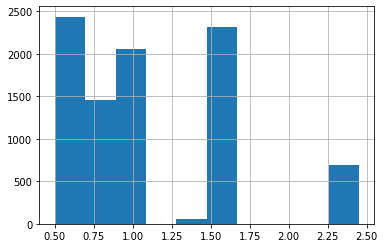

In [34]:
# 30% <= 0.7; 30% > 0.7 & <= 1.4; 30% >1.4
# df3 = df.loc[(df.number_of_rents_2020 >= 3)&(pd.isnull(df.score) == False)]
dfkbm = pd.merge(df,kbm, on = 'user_ext', how = 'left')
df07 = dfkbm.loc[dfkbm.KBM <= 0.7]
df07 = df07.sample(n = 3000)
df14 = dfkbm.loc[(dfkbm.KBM > 0.7)&(dfkbm.KBM <=1.4)]
df14 = df14.sample(n = 3000)
df25 = dfkbm.loc[dfkbm.KBM > 1.4]
df25 = df25.sample(n = 3000)
smpl = pd.concat([df07,df14,df25]).reset_index(drop = True)
smpl['KBM'].hist()
# test = df.loc[(pd.isnull(df.score) == True)&(df.number_of_rents_2020 >= 3)]

In [123]:
# TESTING REGULAR EXPRESSIONS

l1 = '1234567890'
l2 = '12АУ567890'
l3 = '12АУ№56789'
l4 = '№123456789'
dc1 = '770-123'
dc2 = '770--123'
dc3 = '770 123'
n1 = 'Алексей'
n2 = 'Алексей-Иоанн'
n3 = 'Алексей - Иоанн'
pat = re.compile('\w{10}')
pat2 = re.compile('\d\d\d-\d\d\d')
pat3 = re.compile('[а-яА-я- ]')
# for i in [l1,l2,l3,l4]:
#     print(i,bool(pat.match(i)) == False)
# for i in [dc1,dc2,dc3]:
#     print(i, bool(pat2.match(i))
# for i in [n1,n2,n3]:
#     print(i,bool(pat3.match(i)) == True)
test = pd.DataFrame({'name':['Алексей','Алексей-Иоанн', 'Алексей - Иоанн','Alex','_Alex','Alex9','Фекрет Оглы','Иван (завод)',\
                            '1111345678','1111 345678', '1234569999','АБ04 199800',"XX07123456","ХХ0712345/"]})
# test['check'] = test['name'].str.match(pat = '(^[а-яА-Я]+$)|(^[а-яА-Я]+\-[а-яА-Я]+$)|(^[а-яА-Я]+\s\-\s[а-яА-Я]+$)|(^[а-яА-Я]+\s[а-яА-Я]+$)') == True
# test['name'] = test['name'].replace(to_replace = '\s\(.+\)',value = 'X',regex = True)
# test = test['name'].str.replace(' Оглы','')
test['check'] = test.name.str.match(pat = r'(\d)\1{3,}')
test['check2'] = test.name.str.match(pat = r'^[0-9а-яА-Яa-zA-Z ]+$')
# df['check'] = df['License'].str.match(pat = r'(\d)\1{3,}')
test

,name,check,check2
0,Алексей,False,True
1,Алексей-Иоанн,False,False
2,Алексей - Иоанн,False,False
3,Alex,False,True
4,_Alex,False,False
5,Alex9,False,True
6,Фекрет Оглы,False,True
7,Иван (завод),False,False
8,1111345678,True,True
9,1111 345678,True,True
